<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_07_ProjSeven_UnsuerpvisedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets
from sklearn import ensemble
from sklearn import discriminant_analysis
from sklearn import neighbors
from sklearn import random_projection
from sklearn import decomposition
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import manifold

from scipy import ndimage

from time import time
import os

In [ ]:
dpi = 226
path = './handwritten_text/'
f_list = ['A.jpg', 'B.jpg', 'C.jpg', 'D.jpg', 'E.jpg', 'F.jpg',
             'G.jpg', 'H.jpg', 'I.jpg', 'J.jpg', 'K.jpg', 'L.jpg']

def split_page(img):
    temp = []
    g = 75
    rc = img.shape[0]
    cc = img.shape[1]
    ri = 0
    for i in range(rc):
        ci = 0
        for j in range(cc):
            #ci += 1
            if((ci < cc) and (ri < rc)):
                blop = img[ri:ri+g, ci:ci+g].copy()
                temp.append(blop)
                ci += g
        ri += g
    print('len(temp):', len(temp))
    return temp

def save_to_fig(img_list, fname, pix, dpi):
    os.makedirs(path + 'data/' + fname.split('.')[0], exist_ok=True)
    for i in range(len(img_list)):
        plt.figure(figsize=(pix/dpi, pix/dpi), dpi=dpi)
        plt.imshow(img_list[i], cmap='gray')
        plt.axis('off')
        plt.savefig(path + 'data/' + fname.split('.')[0] + '/' + fname.split('.')[0] + '_' + str(i) + '.jpg')
        plt.close()

pix = 64
for fname in f_list:
    img = plt.imread(path + fname)
    img_list = split_page(img)
    save_to_fig(img_list, fname, pix, dpi)

len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704


In [ ]:
data = []

i = 0
img_dir = path + 'data/'
dirs = list(os.walk(img_dir))[0][1]
for subdir in dirs:
    subdir_path = os.path.join(img_dir, subdir)
    file_list = os.listdir(subdir_path)
    for fname in file_list:
        file_path = os.path.join(subdir_path, fname)
        img = plt.imread(file_path)
        A = img [:,:,0]
        if(i==0):
            X = np.ravel(A).reshape(1, A.shape[0]*A.shape[1])
            y = [fname.split("_")[0]]
            i+=1
        else:
            X = np.vstack([X, np.ravel(A)])
            y.append(fname.split("_")[0])
        plt.clf()
        plt.close()
y_main = y.copy()
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y = y.reshape(-1)
X_main = X.copy()

print(X.shape)
print(len(y))

(8448, 4096)
8448


In [ ]:
d = X.reshape(X.shape[0], int(X.shape[1]**0.5), int(X.shape[1]**0.5))
d.shape

(8448, 64, 64)

In [ ]:
set(tuple(zip(y_main, y)))

{('A', 0),
 ('B', 1),
 ('C', 2),
 ('D', 3),
 ('E', 4),
 ('F', 5),
 ('G', 6),
 ('H', 7),
 ('I', 8),
 ('J', 9),
 ('K', 10),
 ('L', 11)}

In [ ]:
X = X_main.copy()
scl = preprocessing.StandardScaler()
X = scl.fit_transform(X)
y = y
print(X.shape, y.shape)
pix = 64

(8448, 4096) (8448,)


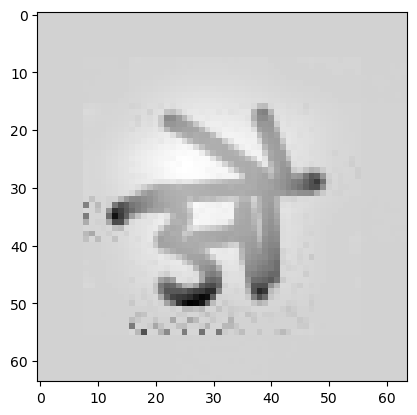

In [ ]:
plt.imshow(X[1000,:].reshape(64,64), cmap='gray')
plt.show()

Random 2D projection  in progress ...
done!
PCA  in progress ...
done!
LDA  in progress ...
done!
Isomap  in progress ...


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


done!
Locally Linear Embedding  in progress ...
done!
Modified LLE  in progress ...
done!
Manifold MDS  in progress ...


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


done!
Spectral Embedding  in progress ...
done!
t-SNE  in progress ...
done!
NCA  in progress ...
done!
Voila! 


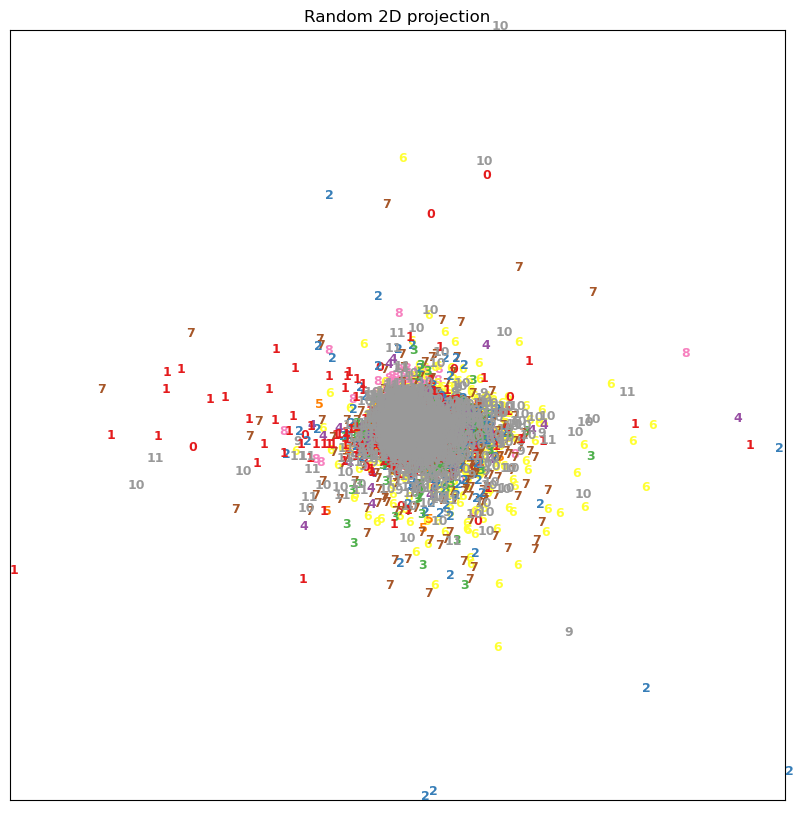

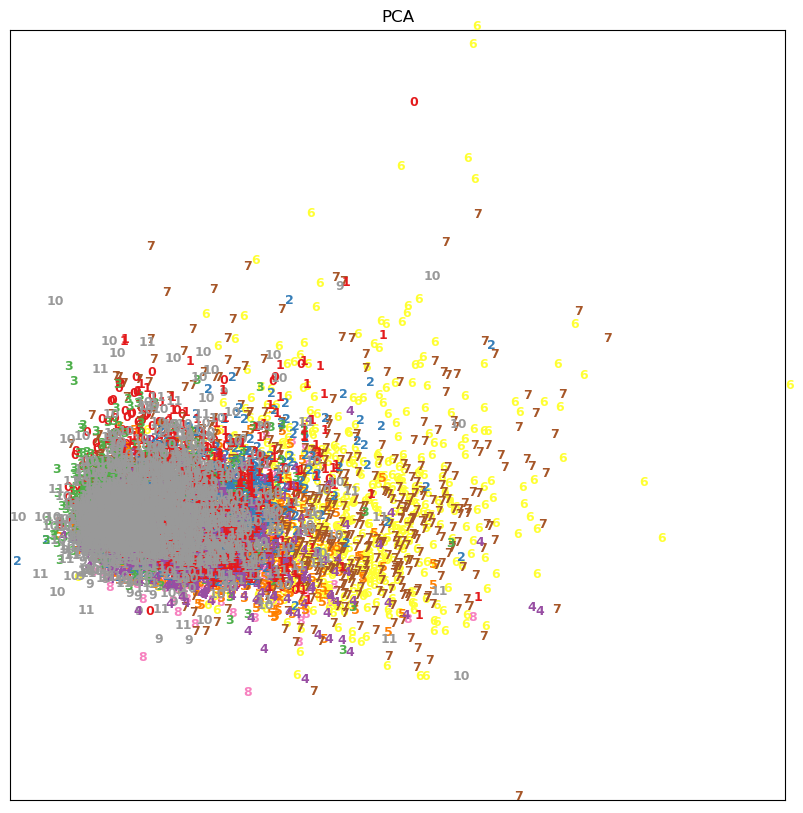

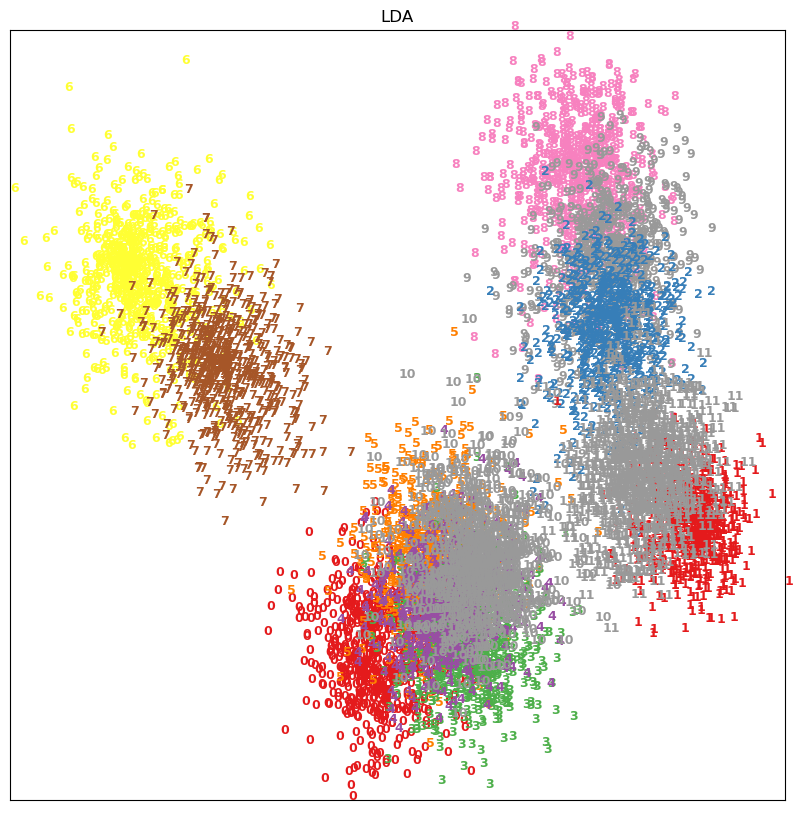

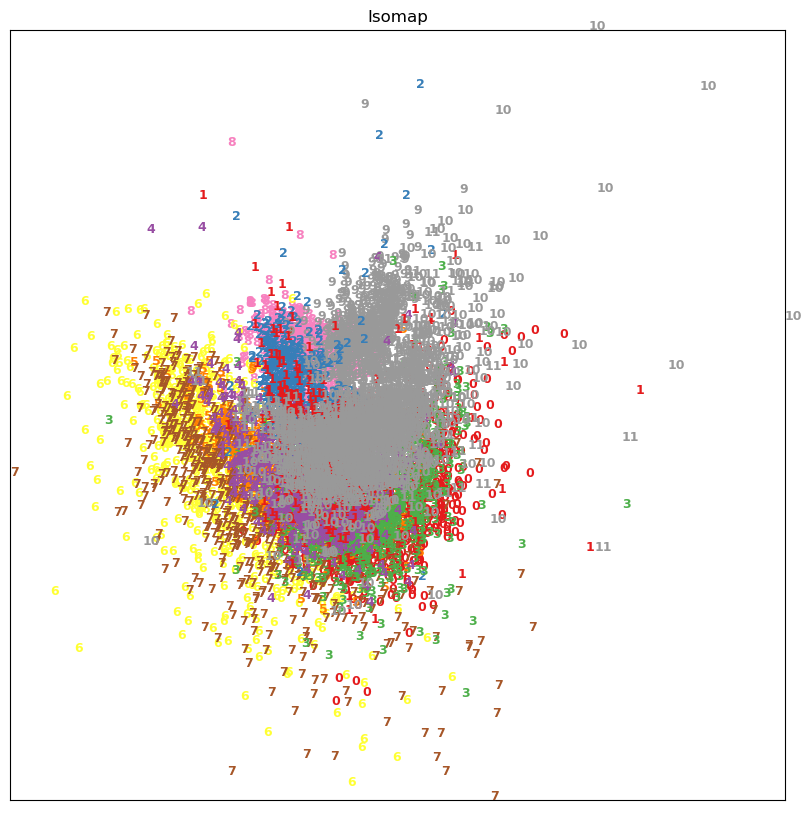

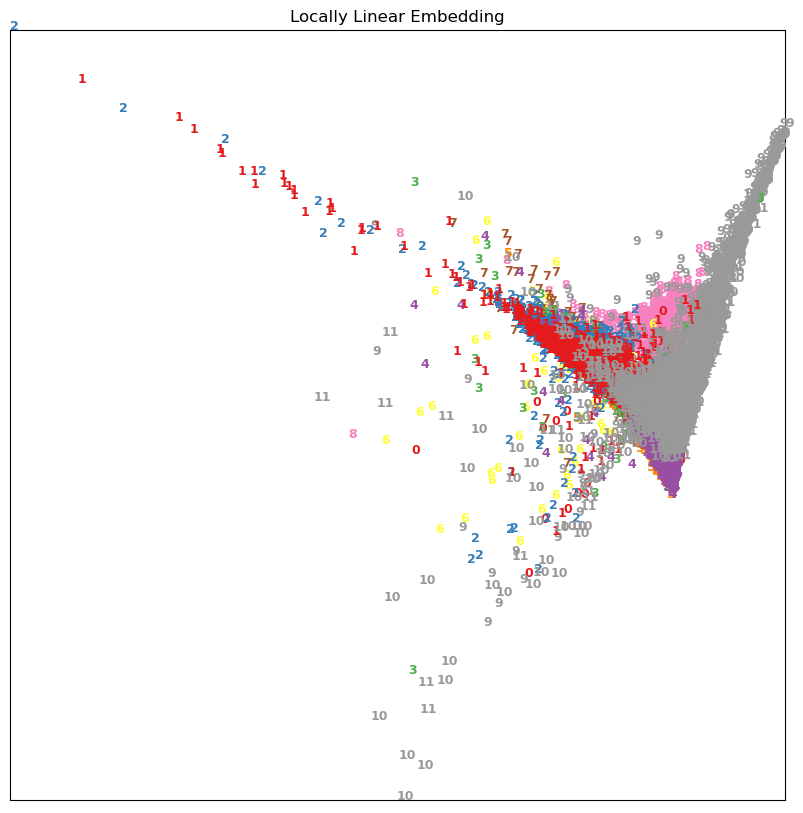

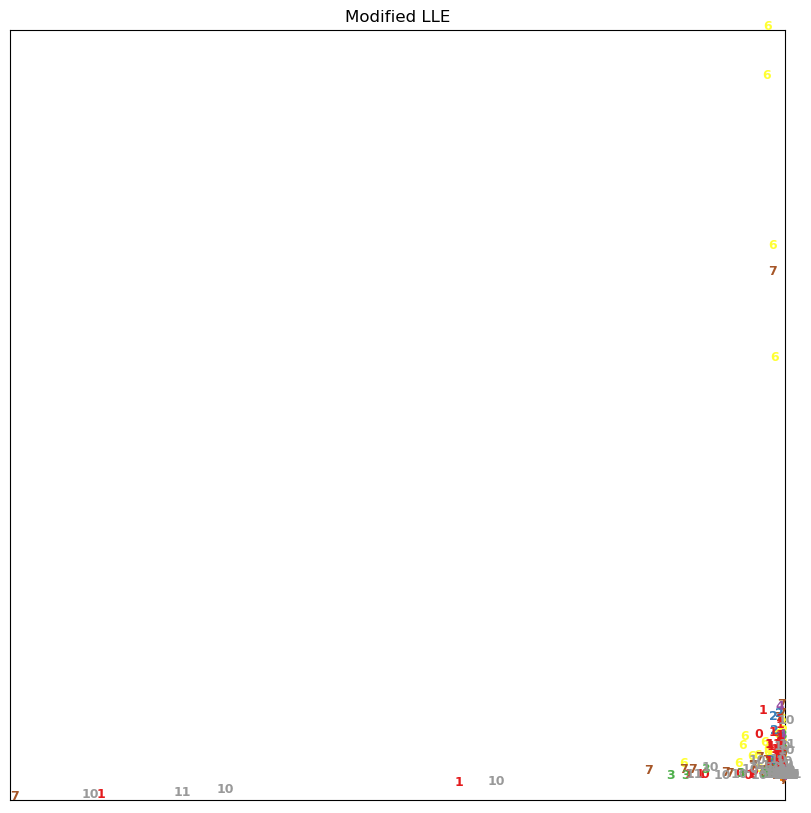

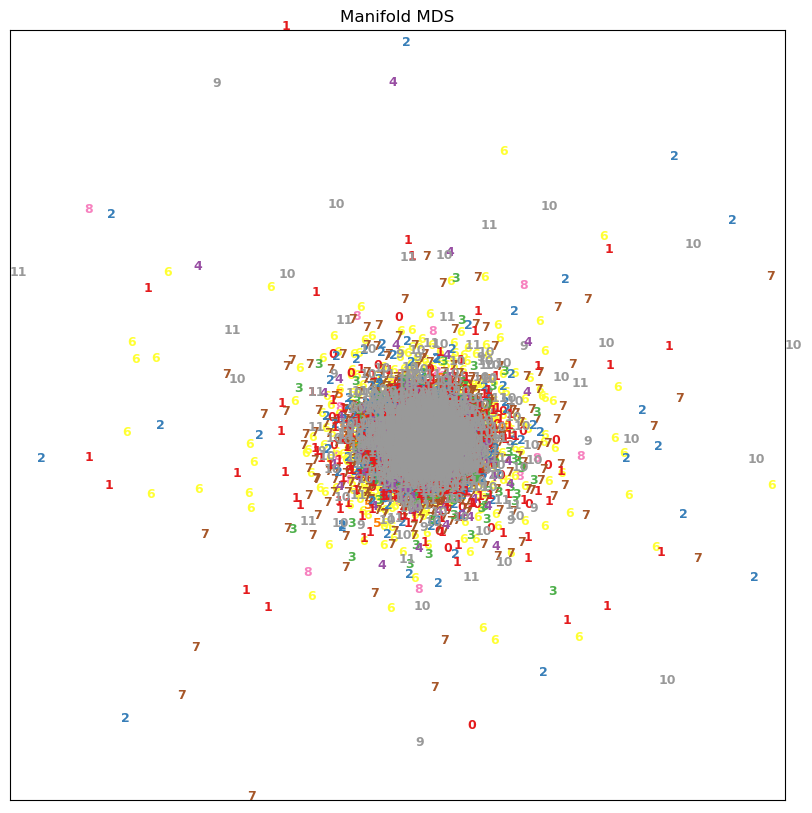

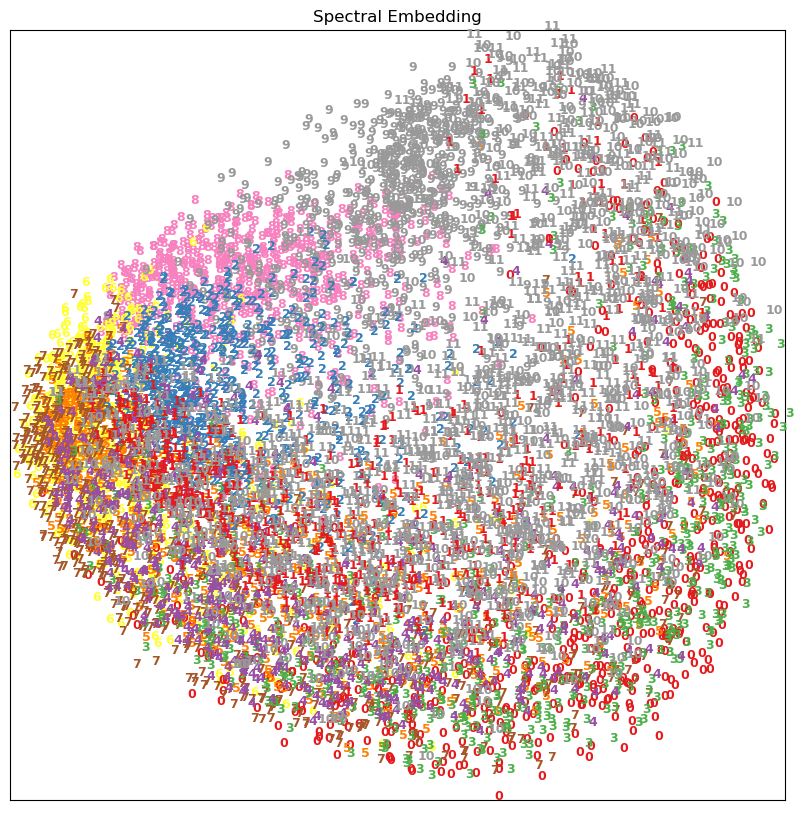

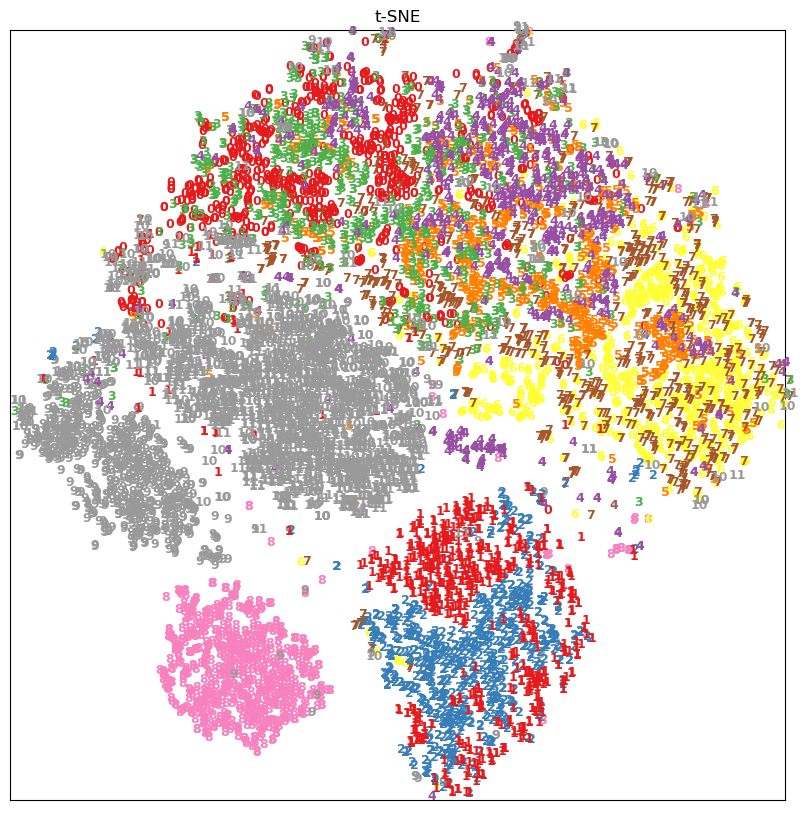

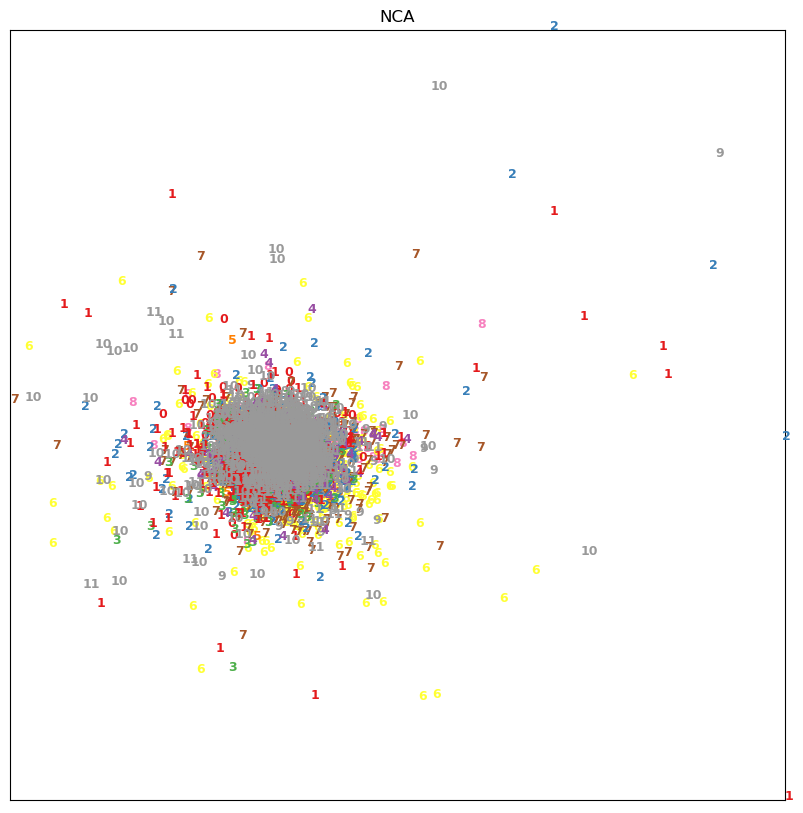

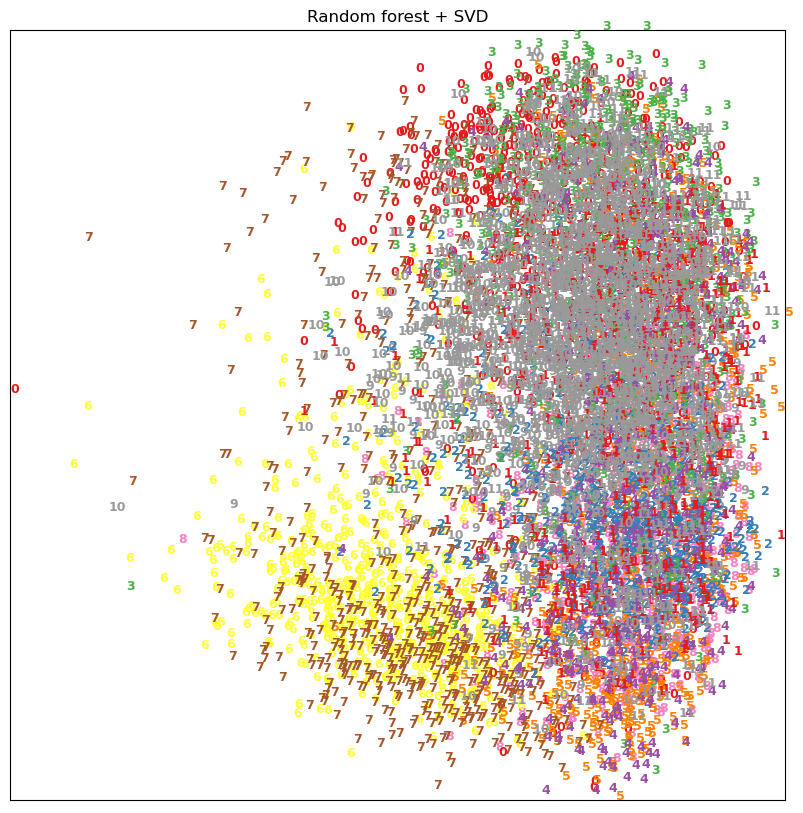

In [ ]:
def plot_proj(X, title=None):
    scl = preprocessing.MinMaxScaler()
    X = scl.fit_transform(X)
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    plt.title(title)

n_neighbors=30
models = [
    ('Random 2D projection', random_projection.SparseRandomProjection(n_components=2, random_state=0)),
    ('PCA', decomposition.TruncatedSVD(n_components=2)),
    ('LDA', discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)),
    ('Isomap', manifold.Isomap(n_neighbors=n_neighbors, n_components=2)),
    ('Locally Linear Embedding', manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,method='standard')),
    ('Modified LLE', manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,method='modified')),
    ('Manifold MDS', manifold.MDS(n_components=2, n_init=1, max_iter=100)),
    ('Spectral Embedding', manifold.SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")),
    ('t-SNE', manifold.TSNE(n_components=2, init='pca',perplexity=50,random_state=0)),
    ('NCA', neighbors.NeighborhoodComponentsAnalysis(init='random', n_components=2, random_state=0))
]
for name, model in models:
    print(name, ' in progress ...')
    if (name=='LDA'):
        X2 = X.copy()*1.0
        X2.flat[::X.shape[1] + 1] += 0.01
        X_trans = model.fit_transform(X2, y.reshape(-1,))
    elif(name=='NCA'):
        X_trans = model.fit_transform(X,y)
    else:
        X_trans = model.fit_transform(X)

    plot_proj(X_trans, name)
    print('done!')


# Random Trees
X_t = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,max_depth=5).fit_transform(X)
X_trans = decomposition.TruncatedSVD(n_components=2).fit_transform(X_t)
plot_proj(X_trans,"Random forest + SVD")

print('Voila! ')

plt.show()

In [ ]:
def get_cluster_metrics(y, y_pred):
    metrics_list = [
        ('rand_score (RI) \n[0 to 1 (good)]', metrics.rand_score(y, y_pred)),
        ('adjusted_rand_score (ARI) \n[0 to 1 (good)]', metrics.adjusted_rand_score(y, y_pred)),
        ('mutual_info_score (MI) \n[0 to 1 (good)]', metrics.mutual_info_score(y, y_pred)),
        ('adjusted_mutual_info_score (AMI) \n[0 to 1 (good)]', metrics.adjusted_mutual_info_score(y, y_pred)),
        ('homogeneity_completeness_v_measure \n[0 to 1 (good)]', metrics.homogeneity_completeness_v_measure(y, y_pred)),
        ('fowlkes_mallows_score (FMI) \n[0 to 1 (good)]', metrics.fowlkes_mallows_score(y, y_pred)),
        ('silhouette_score \n[-1 to 1 (good)]', metrics.silhouette_score(X, y_pred)),
        ('calinski_harabasz_score \n[low to high (good)]', metrics.calinski_harabasz_score(X, y_pred)),
        ('davies_bouldin_score  \n[0 (good) to high]', metrics.davies_bouldin_score(X, y_pred))
    ]
    for name, metric in metrics_list:
        print(name,"\t:", np.round(metric, 2))
    print("\n")


# Plot cluster
# Function to plot
def plot_cluster(X, labels, title=None):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.nipy_spectral(labels[i] / 10.))
        plt.title(title, size=18)

In [ ]:
X = X_main.copy()
y = y
x1 = X[y==2]
x2 = X[y==9]
x3 = X[y==6]

y1 = y[y==2]
y2 = y[y==9]
y3 = y[y==6]

X = np.vstack([x1,x2,x3])
y = np.hstack([y1,y2,y3])
scl = preprocessing.StandardScaler()
X = scl.fit_transform(X)
print(X.shape, y.shape)

(2112, 4096) (2112,)


In [ ]:
n_clusters= len(set(y))
print("True number of clusters: ", n_clusters)



# Create models
bandwidth = cluster.estimate_bandwidth(X, quantile=.99, n_samples=500)

models = [
    ('MiniBatch KMeans', cluster.MiniBatchKMeans(n_clusters=n_clusters)),
    ('Affinity Propagation', cluster.AffinityPropagation(damping=0.99, random_state=0,
                                                        max_iter=1000)),
    ('MeanShift', cluster.MeanShift(bandwidth=bandwidth)),
    ('Spectral Clustering', cluster.SpectralClustering(n_clusters=n_clusters,
                                                       #n_components=2,
                                                       random_state=0,
                                                      n_neighbors=50,
                                                       affinity='nearest_neighbors')),
    ('Agglomerative Clustering', cluster.AgglomerativeClustering(linkage='ward',
                                                                 n_clusters=n_clusters)),
    ('DBSCAN', cluster.DBSCAN(eps=22, min_samples=7)), #100
    ('OPTICS', cluster.OPTICS()),
    ('BIRCH', cluster.Birch(n_clusters=n_clusters))
]
for name, model in models:
    print('\n','-'*25)
    print(name)
    print('-'*25)

    model.fit(X)

    if hasattr(model, 'labels_'):
        print('* using labels *')
        y_pred = model.labels_.astype(int)
    else:
        print('* using predict *')
        y_pred = model.predict(X)


    if (name in ['Affinity Propagation','MeanShift']):
        print("Number of clusters found: ", len(model.cluster_centers_))
    elif (name in ['DBSCAN','OPTICS', 'BIRCH' ]):
        print("Number of clusters found: ", set(model.labels_))
    else:
        print("Number of clusters asked to find: ", n_clusters)


    get_cluster_metrics(y, y_pred)

True number of clusters:  3

 -------------------------
MiniBatch KMeans
-------------------------


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* using labels *
Number of clusters asked to find:  3
rand_score (RI) 
[0 to 1 (good)] 	: 0.74
adjusted_rand_score (ARI) 
[0 to 1 (good)] 	: 0.43
mutual_info_score (MI) 
[0 to 1 (good)] 	: 0.51
adjusted_mutual_info_score (AMI) 
[0 to 1 (good)] 	: 0.47
homogeneity_completeness_v_measure 
[0 to 1 (good)] 	: [0.46 0.48 0.47]
fowlkes_mallows_score (FMI) 
[0 to 1 (good)] 	: 0.63
silhouette_score 
[-1 to 1 (good)] 	: 0.06
calinski_harabasz_score 
[low to high (good)] 	: 67.15
davies_bouldin_score  
[0 (good) to high] 	: 4.32



 -------------------------
Affinity Propagation
-------------------------
* using labels *
Number of clusters found:  219
rand_score (RI) 
[0 to 1 (good)] 	: 0.69
adjusted_rand_score (ARI) 
[0 to 1 (good)] 	: 0.12
mutual_info_score (MI) 
[0 to 1 (good)] 	: 0.85
adjusted_mutual_info_score (AMI) 
[0 to 1 (good)] 	: 0.32
homogeneity_completeness_v_measure 
[0 to 1 (good)] 	: [0.77 0.23 0.35]
fowlkes_mallows_score (FMI) 
[0 to 1 (good)] 	: 0.29
silhouette_score 
[-1 to 1 

In [ ]:
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y_main)
y = y.reshape(-1)
print(y.shape, len(y_main))

(8448,) 8448


In [ ]:
X = X_main.copy()
y = y
x1 = X[y==2]
x2 = X[y==9]
x3 = X[y==6]

y1 = y[y==2]
y2 = y[y==9]
y3 = y[y==6]

X = np.vstack([x1,x2,x3])
y = np.hstack([y1,y2,y3])


scl = preprocessing.StandardScaler()
X = scl.fit_transform(X)

print(X.shape, y.shape)

(2112, 4096) (2112,)


-------------------------
ward
-------------------------
rand_score (RI) 
[0 to 1 (good)] 	: 0.87
adjusted_rand_score (ARI) 
[0 to 1 (good)] 	: 0.72
mutual_info_score (MI) 
[0 to 1 (good)] 	: 0.8
adjusted_mutual_info_score (AMI) 
[0 to 1 (good)] 	: 0.74
homogeneity_completeness_v_measure 
[0 to 1 (good)] 	: [0.73 0.75 0.74]
fowlkes_mallows_score (FMI) 
[0 to 1 (good)] 	: 0.82
silhouette_score 
[-1 to 1 (good)] 	: 0.0
calinski_harabasz_score 
[low to high (good)] 	: 62.08
davies_bouldin_score  
[0 (good) to high] 	: 4.66


-------------------------
average
-------------------------
rand_score (RI) 
[0 to 1 (good)] 	: 0.95
adjusted_rand_score (ARI) 
[0 to 1 (good)] 	: 0.88
mutual_info_score (MI) 
[0 to 1 (good)] 	: 0.92
adjusted_mutual_info_score (AMI) 
[0 to 1 (good)] 	: 0.84
homogeneity_completeness_v_measure 
[0 to 1 (good)] 	: [0.84 0.84 0.84]
fowlkes_mallows_score (FMI) 
[0 to 1 (good)] 	: 0.92
silhouette_score 
[-1 to 1 (good)] 	: 0.0
calinski_harabasz_score 
[low to high (good)] 	

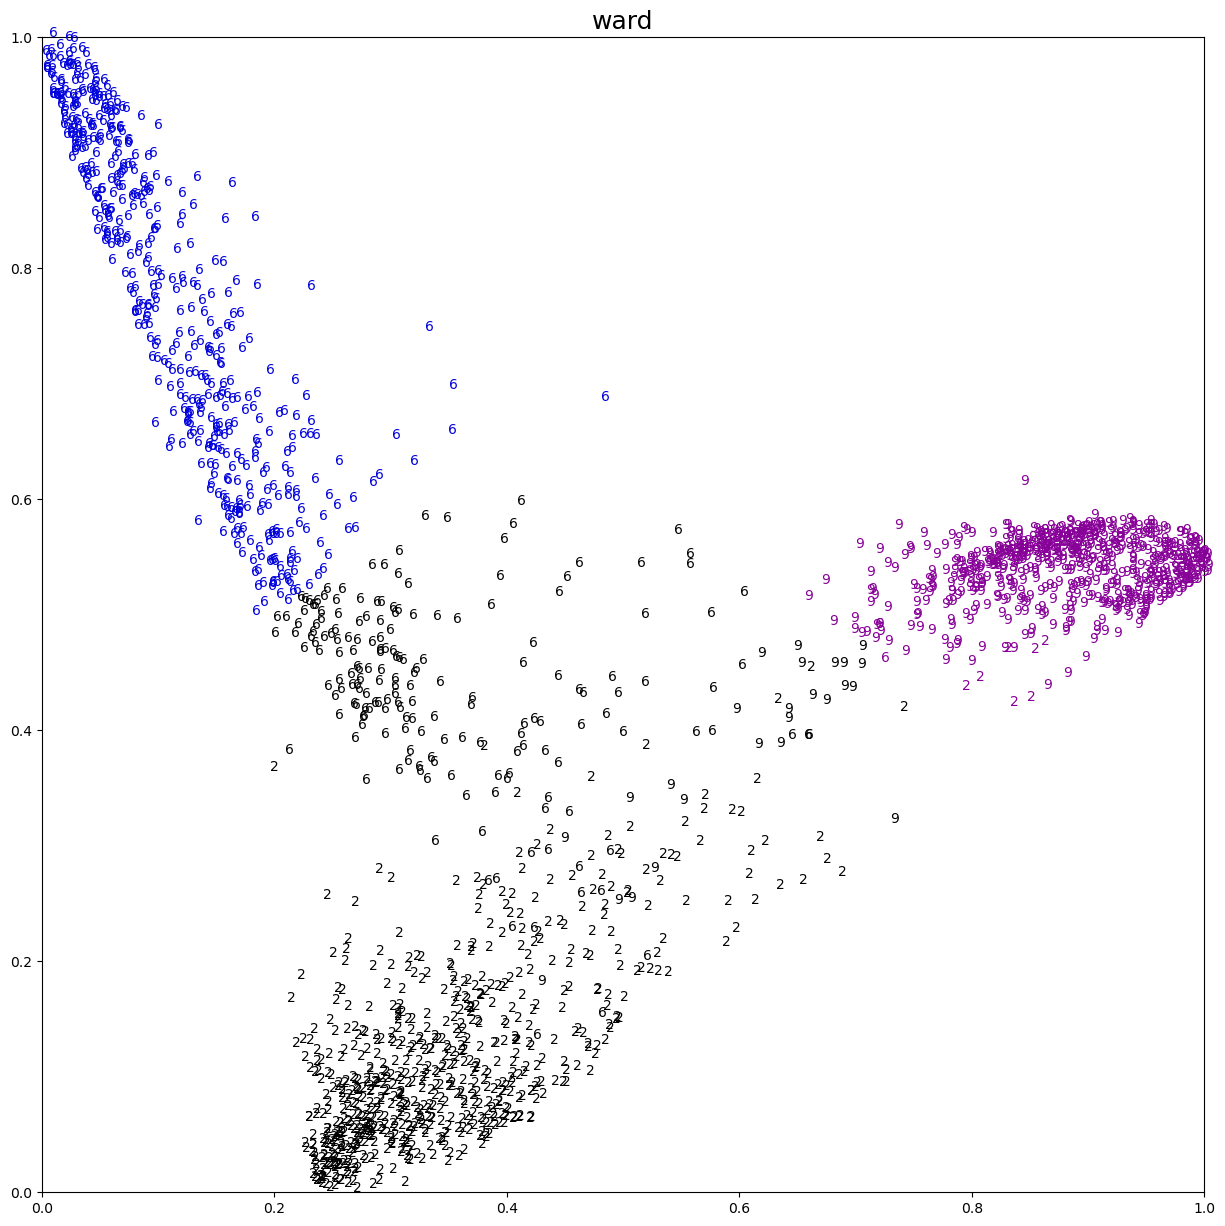

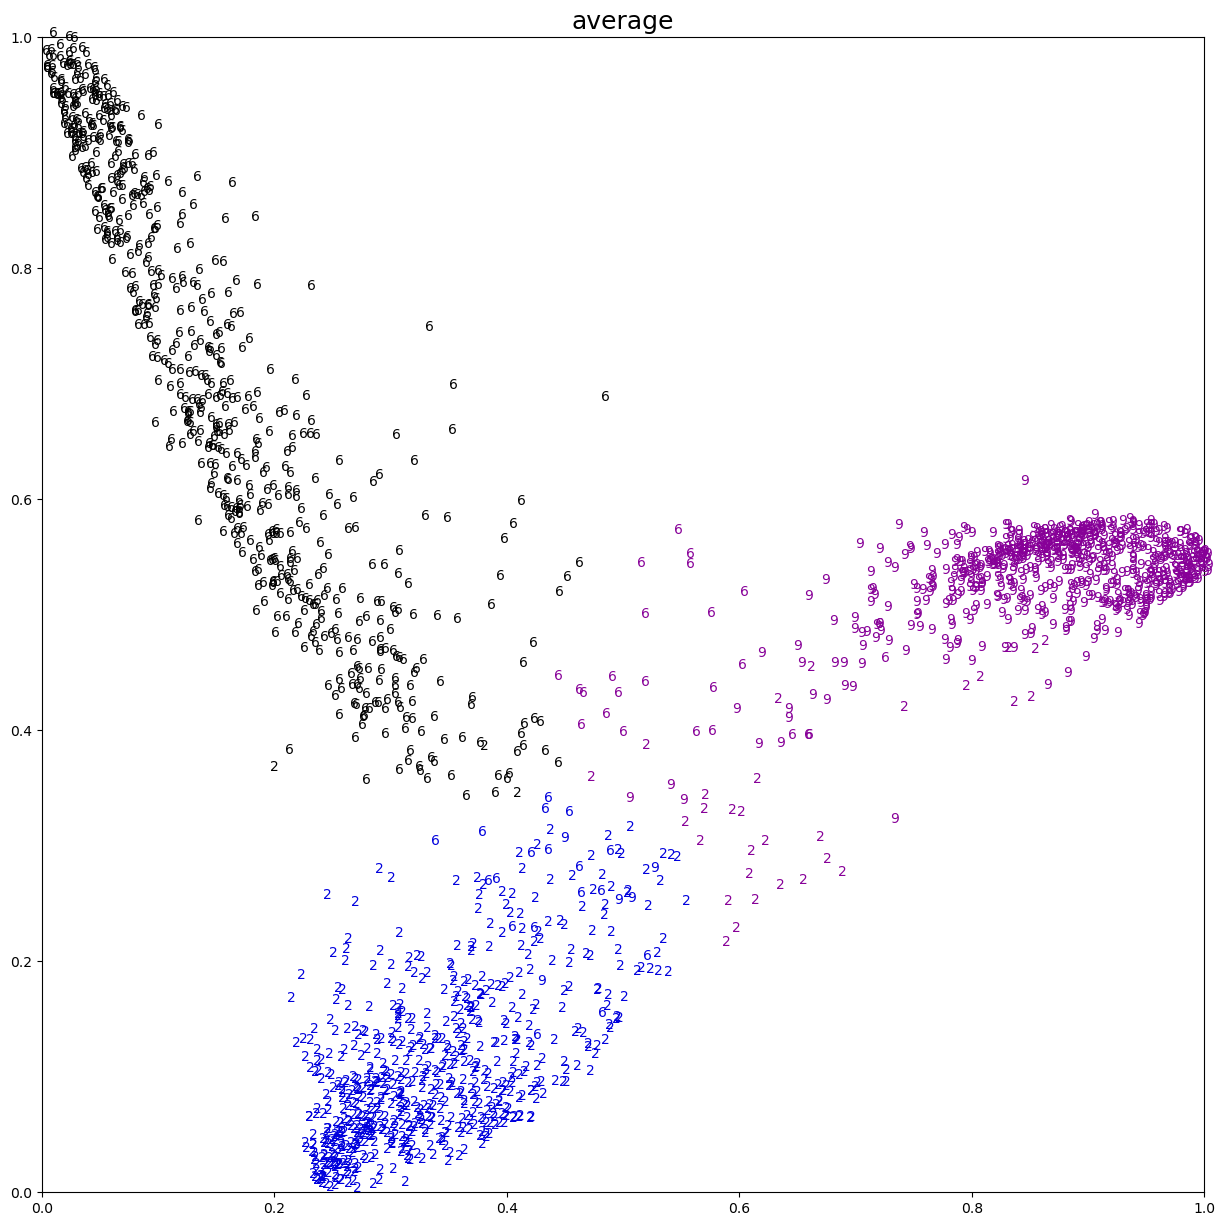

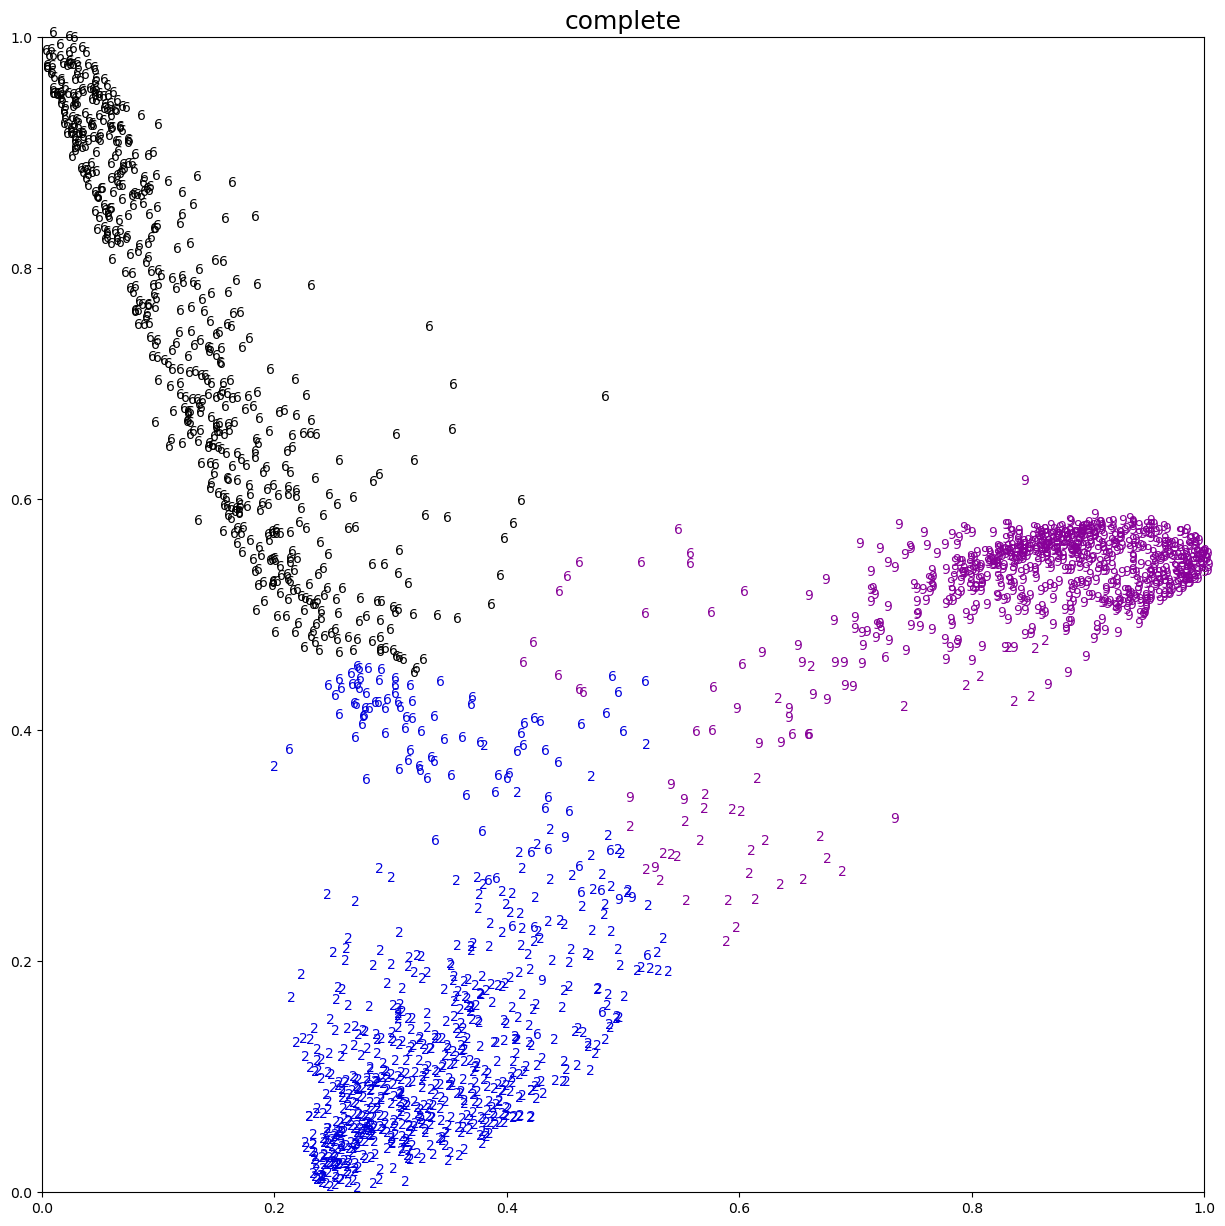

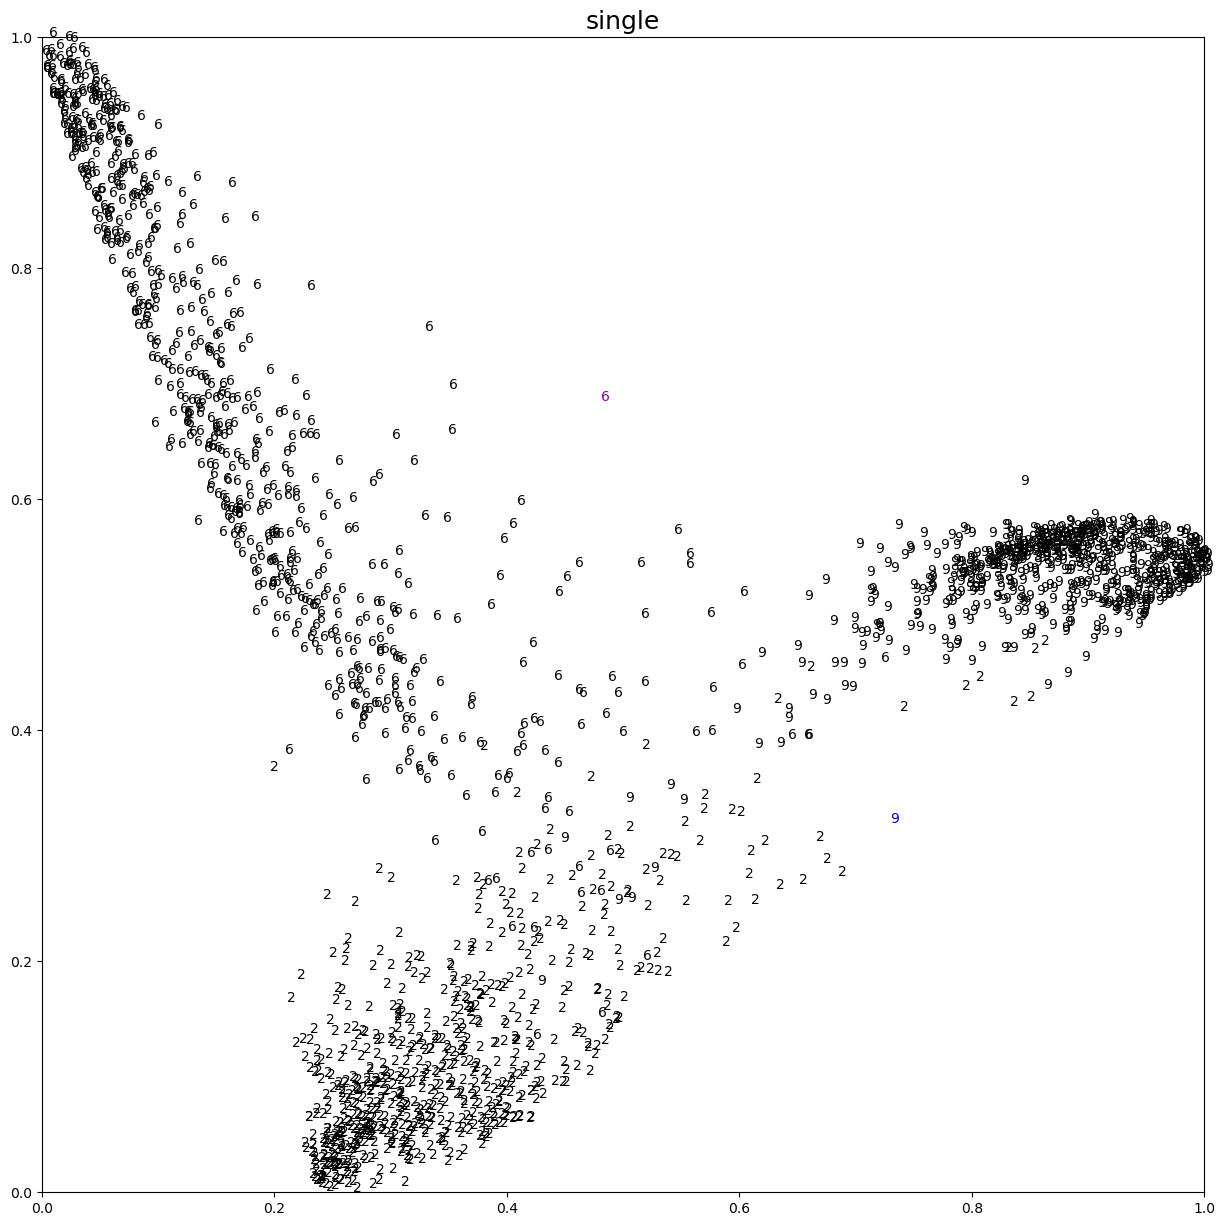

In [ ]:
np.random.seed(0)
n_samples, n_features = X.shape
pix = 64
n_clusters = 3

model = manifold.SpectralEmbedding(n_components=2,
                                   affinity='nearest_neighbors',
                                   n_neighbors=50
                                  )
Xs = model.fit_transform(X)

for linkage in ('ward', 'average', 'complete', 'single'):
    print('-'*25)
    print(linkage)
    print('-'*25)
    clust = cluster.AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters)
    clust.fit(Xs)
    y_pred = clust.labels_.astype(int)
    plot_cluster(Xs, clust.labels_, linkage)
    get_cluster_metrics(y, y_pred)
plt.show()

In [ ]:
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y_main)
y = y.reshape(-1)
print(y.shape, len(y_main))
X = X_main.copy()
scl = preprocessing.StandardScaler()
X = scl.fit_transform(X)
y = y
print(X.shape, y.shape)
pix = 64
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
print(X_train.shape, X_test.shape)

(8448,) 8448
(8448, 4096) (8448,)
(4224, 4096) (4224, 4096)


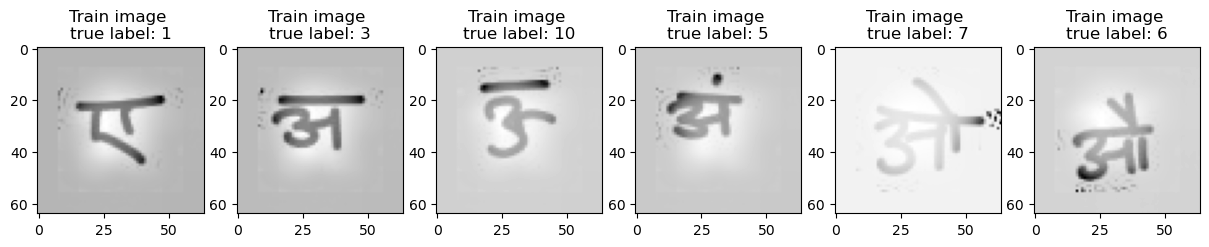

In [ ]:
np.random.seed(1)

show_img = 6
n_sample = np.random.randint(1,len(X_test),show_img)
fig, axs = plt.subplots(nrows=1, ncols=show_img, figsize=(15,5))
for ax, img, true_l in zip(axs, X_train[n_sample,:], y_train[n_sample]):
    img = img.reshape(64,64)
    ax.imshow(img, cmap='gray')
    ax.set_title('Train image \ntrue label: '+ str(true_l))

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

NameError: name 'clf' is not defined

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=show_img, figsize=(15,5))
for ax, img, pred_l, true_l in zip(axs, X_test[n_sample,:], y_pred[n_sample], y_test[n_sample]):
    img = img.reshape(64,64)
    ax.imshow(img, cmap='gray')
    ax.set_title('Test image \nTrue label: '+ str(true_l) + '\n Predicted label: '+ str(pred_l))

In [ ]:
print("Classification report\n", metrics.classification_report(y_test, y_pred))

In [ ]:
cm = metrics.plot_confusion_matrix(clf, X_test, y_test)
plt.show()